# UCK 358E – Introduction to Artificial Intelligence 
## Homework 1
## Deadline: April 07, 2024




#### Name: Ecem Sengel
#### Student Number: 110200149

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## import any library that you will use


c:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data (don't change anything in this part, just run it) 

In [2]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [5]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [6]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [7]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5927,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6187,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3872,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2, y_train2) for training and (X_test2, y_test2) for testing your model. X_train2 only contains categorical features. </font>

## Part a) you have four features to train a model. You will train linear regression and logistic regression models. You are free to use sklearn in this part 

### a1) Train linear regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. (Remember linear regression is for regression tasks, you need to round the prediction to use it for classification tasks) 

In [8]:
# write your code and explanations into the blank lines after each question
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


Firstly we check our data for both test and train if there are any missing values:

In [9]:
X.columns[X.isnull().any()]

Index([], dtype='object')

I did nothing to fill the missing values since there is no null values in any feature,firsly,  am normilizng the features and than I am just training and testing the linear regression algorithm with raw data:

In [10]:
scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

Linear Regression:

with nomalization:

In [12]:
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(X_train_norm, y_train)
y_pred_linear_norm = model_linear.predict(X_test_norm)
final_predictions_linear_norm=y_pred_linear_norm.round()
final_predictions_linear_norm

array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [4.],
       [4.]])

without normalization:

In [13]:
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
final_predictions_linear=y_pred_linear.round()
final_predictions_linear

array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [4.],
       [4.]])

Checking the accuracy rates:

In [14]:
linear_reg_accuracy = accuracy_score(y_test, final_predictions_linear)
linear_reg_accuracy_norm = accuracy_score(y_test, final_predictions_linear_norm)
print("Linear Regression Accuracy Rate Without Normalization:", linear_reg_accuracy)
print("Linear Regression Accuracy Rate With Noralization:", linear_reg_accuracy_norm)

Linear Regression Accuracy Rate Without Normalization: 0.1457231040564374
Linear Regression Accuracy Rate With Noralization: 0.1457231040564374


* Checking if there is overfitting in the training section:

    Accuracy rates are the same as without normalization, and it seems to have a very low value. It can be seen that the accuracy rates in both fit processes are around 15 percent. There may be two reasons for having such a low accuracy rate in the test data set, these are overfitting and underfitting. To observe whether there is overfitting, after training the model with train data, you can check the accuracy rate by making predictions with train data again. If there are values ​​very close to one, we can say that there is overfitting.

In [15]:
y_pred_linear = model_linear.predict(X_train_norm)
final_predictions_linear_train=y_pred_linear.round()
linear_reg_accuracy_train = accuracy_score(y_train, final_predictions_linear_train)
print("Linear Regression Training Accuracy Rate With Normalization:", linear_reg_accuracy_train)

Linear Regression Training Accuracy Rate With Normalization: 0.143140589569161


As can be seen, when we make predictions directly from the train data set, we get very low accuracy rates. So, there is an underfitting problem here, rather than overfitting.

Here as we can see only three classification is done, eventhough there are seven Cover_Type kind. It can also be seen that the predictions are not satisfying.

Checking the correlations of the features with the each other:

<function matplotlib.pyplot.show(close=None, block=None)>

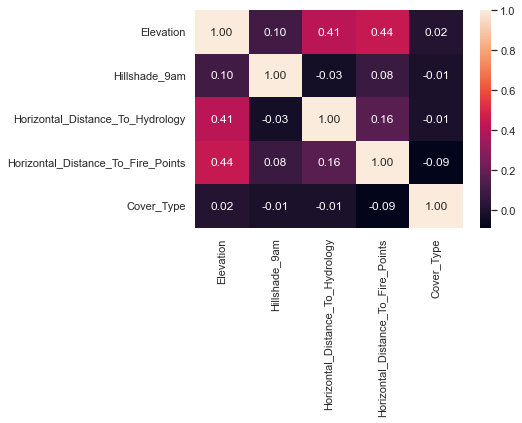

In [17]:
list_features =["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]
sns.heatmap(df_new[list_features].corr(), annot=True,fmt=".2f")
plt.show

# The most correlated feature with the cover_type seems as Elevation. Adiitionaly Elevation is mostly correlated with Horizontal_Distance_To_Hydrology,
# and Horizontal_Distance_To_Fire_Points.

Checking the pairplot of the data to see the data and figure out what can be the reasons linear regression does not work properly for that data:

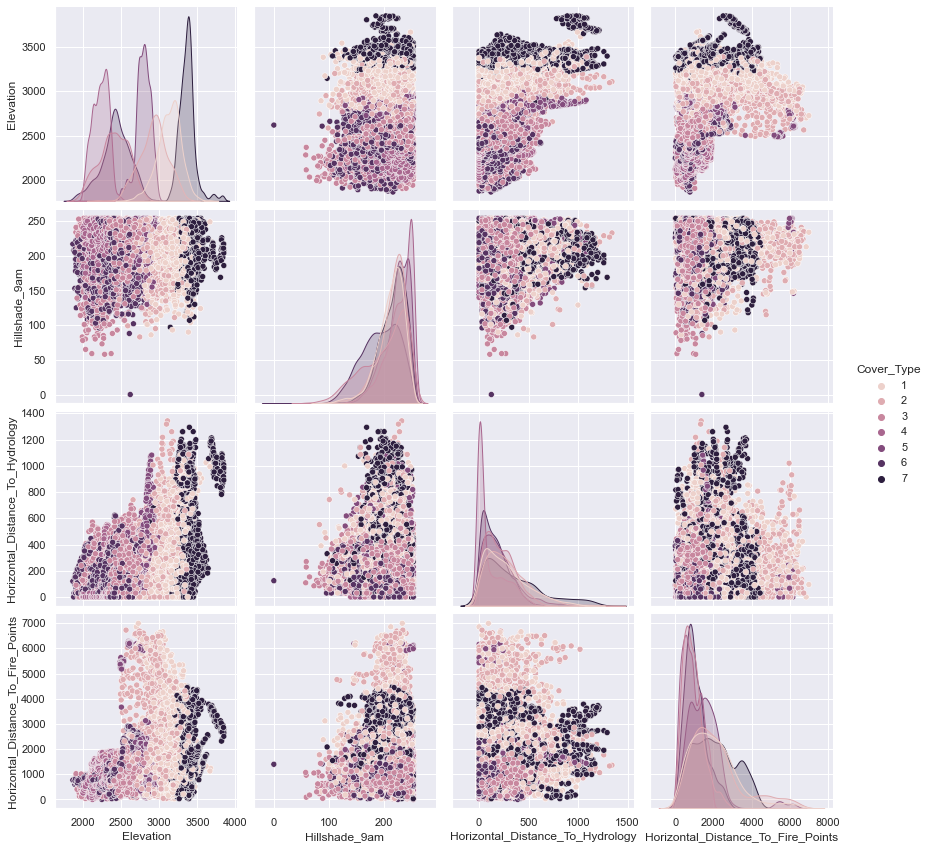

In [18]:
sns.pairplot(df_new, hue='Cover_Type', height=3);

Printing Out The Predictions:

While plotting the predicted values, we may prefer to use the "elevation" and "Horizontal_Distance_To_Hydrology" values, which are the two features with the most correlation, to see the grouping more clearly.  These fetaurs were actually decided by looking at the correlation matrix and pairplot to make visualization more clearly. We can visuilaze how the predictions look like as:

In [11]:
pred_linear = X_test.copy()
pred_linear['Cover_Type'] = final_predictions_linear
sns.lmplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=pred_linear, hue='Cover_Type', col='Cover_Type', fit_reg=False)

NameError: name 'final_predictions_linear' is not defined

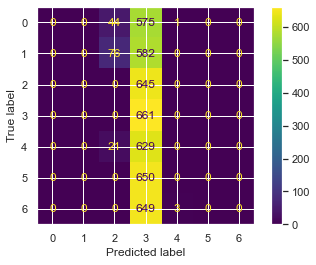

In [19]:
c_m = confusion_matrix(y_test,final_predictions_linear , labels=None, sample_weight=None, normalize=None)
disp =ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels=None)
disp.plot()
plt.show()

- Final conculusion for the linear regression:


As can be seen from the confusion matrix, all types are confused with Cover_Type 3 at most. To interpret why the accuracy rate is so low, pariplot can be looked at. When looking at the pairplot, it can be understood that we are working with a data set that is unlikely to fit into a linear function and is very mixed into each other. For this reason, data gives low accuracy rates when linear regression is used.

### a2) Train logistic regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. Also plot confusion matrix and make a discussion on it. Compare the result with part a1. 

The same operations as in the previous section are done for logistic instead of linear this time. Firstly the model is created and normilized and unnormilized data set trained to check the difference between results.

In [12]:
#Creating the Logistic Regression Model:
model_logistic = LogisticRegression(random_state=42)

#Training model with unnormilized model:
model_logistic.fit(X_train, y_train)

#There is no need to round the predictions to optain final version of the predictions, they alrady consist of integers differently than linear regression.
final_predictions_logistic = model_logistic.predict(X_test)


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Training model with normilized model:
model_logistic.fit(X_train_norm, y_train)
final_predictions_logistic_norm = model_logistic.predict(X_test_norm)

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Checking the accuracy rates for both normilized and unnormilized trained predictinons:

In [14]:
log_reg_accuracy = accuracy_score(y_test, final_predictions_logistic)
log_reg_accuracy_norm = accuracy_score(y_test, final_predictions_logistic_norm)
print("Logistic Regression Accuracy Rate Without Normilized Data:", log_reg_accuracy)
print("Logistic Regression Accuracy Rate With Normilized Data:", log_reg_accuracy_norm)

Logistic Regression Accuracy Rate Without Normilized Data: 0.37544091710758376
Logistic Regression Accuracy Rate With Normilized Data: 0.57826278659612


Although it was not seen in the linear regression section, it was actually seen how necessary the normalization process was for logisic regression. Especially when there is no underfit, if there is a large size difference between the feature values ​​in the data set, the accuracy rate will be much lower than it should be when the model is trained without normalization. We have seen this above.

* Checking the overfitting:

In [15]:
y_pred_logistic = model_logistic.predict(X_train_norm)
final_predictions_logistic_train=y_pred_logistic.round()
logistic_reg_accuracy_train = accuracy_score(y_train, final_predictions_logistic_train)
print("Linear Regression Accuracy Rate With Normalization For Training Data:", logistic_reg_accuracy_train)

Linear Regression Accuracy Rate With Normalization For Training Data: 0.6016628873771731


As in linear regression, the train accuracy rate and test accuracy rate were close to each other. Since the accuracy rates are around 60 percent, we cannot say that there is overfitting or underfitting. Although the accuracy rate is not as low as the previous one, it is below the performance we normally expect from such models. More studies can be made to increase the accuracy rate with different methods.

Printing Out The Predictions:

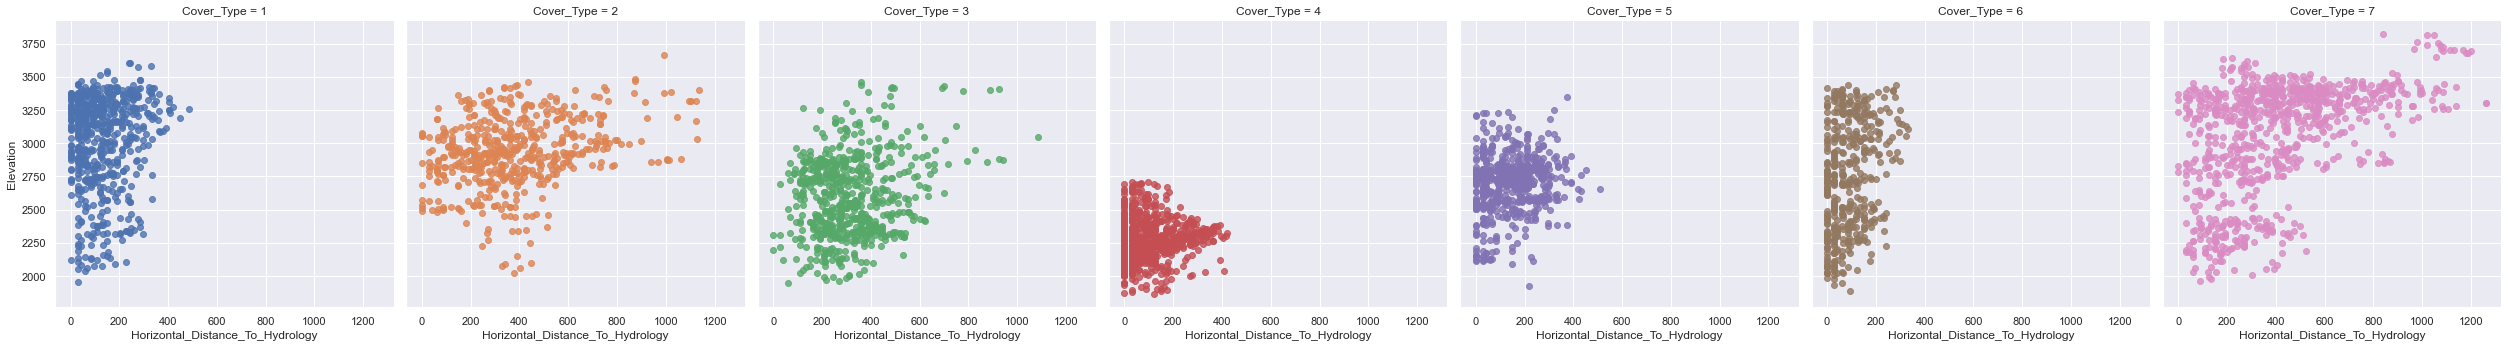

In [24]:
new_pred = X_test.copy()
new_pred['Cover_Type'] = final_predictions_logistic
sns.lmplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=new_pred, hue='Cover_Type', col='Cover_Type', fit_reg=False)

Besides the predictions we can also print out the true results to see the difference more clearly.

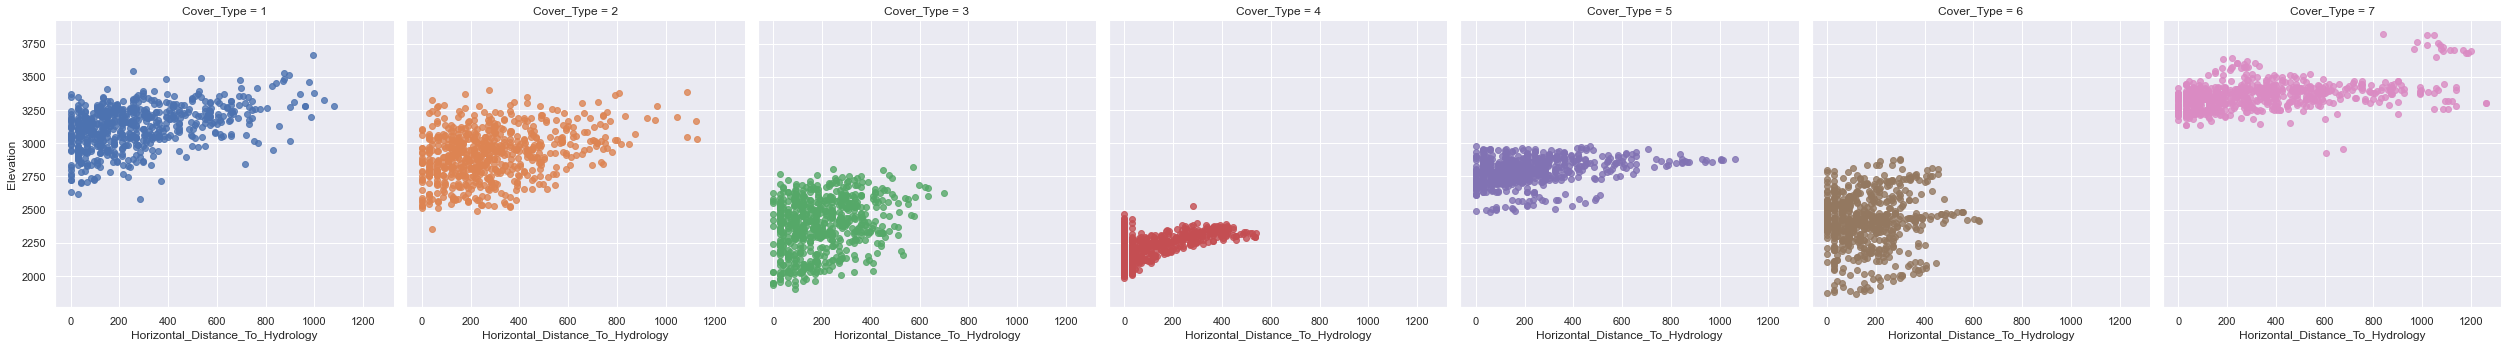

In [25]:
new_itself = X_test.copy()
new_itself['Cover_Type'] = y_test
sns.lmplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=new_itself, hue='Cover_Type', col='Cover_Type', fit_reg=False)

We can see all of the seven kinds of Cover_Type feature. It is much more better than Linear Regression model.

### a3) You only have access to four features (as presented in X_train). What are you suggesting to improve the logistic regression's model accuracy? Implement the proposed approach and compare the result with part a2

Firstly we can look to the correlation matrix again to decide which features can we use. It is more likely to choose most correlated features. They can be used for feature engineering.

<function matplotlib.pyplot.show(close=None, block=None)>

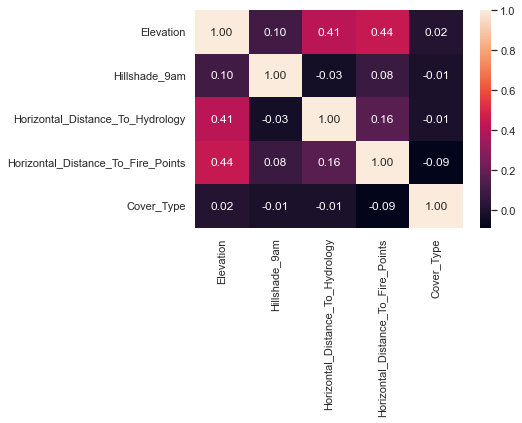

In [26]:
list_features =["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]
sns.heatmap(df_new[list_features].corr(), annot=True,fmt=".2f")
plt.show

The most correlated feature with the cover_type seems as Elevation. Aditionaly, Elevation is mostly correlated with Horizontal_Distance_To_Hydrology, and Horizontal_Distance_To_Fire_Points.

Different solver types and penalty types can be changed to find he best match:

In [16]:
model_logistic_2 = LogisticRegression(penalty = 'none',solver = 'lbfgs',random_state=42)
model_logistic_2.fit(X_train_norm, y_train)
final_predictions_logistic_2 = model_logistic_2.predict(X_test_norm)
logistic_reg_acc_2= accuracy_score(y_test, final_predictions_logistic_2)
print("Updated Linear Regression Accuracy Rate :", logistic_reg_acc_2)


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Updated Linear Regression Accuracy Rate : 0.5947971781305115


c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Among the solver and penalty types defined for LogisticRegression(), the combination with the highest accuracy rate was found by trying one by one.The accuracy rates according to solvers are : 'liblinear' < 'newton-cg' = 'lbfgs' = 'sag' = 'saga'. The default value is 'lbfsg', so there is no need to change the solver.
When I set the penalty to 'none', there is 0.02 point increase seen in the accuracy, the accuracy rate is increased tp 0.593 finally.

New Feature:

There a lot of technique for creating new feature. Creating other features by applying different operations by logically associating the given features with each other, or simply obtaining new features from the given features with only multiplying or summing them up, etc. Here, since the already existing features are very few and it is difficult to establish a logical connection, a method of obtaining a new feature was used by simply selecting the two features that are most connected to each other and multiplying them.

In [28]:
new_feature_train =X_train_norm["Horizontal_Distance_To_Hydrology"] *  X_train_norm["Elevation"]
new_train = X_train_norm.copy()
new_train['New_Feature']= new_feature_train

new_test = X_test_norm.copy()
new_feature_test = X_test_norm["Horizontal_Distance_To_Hydrology"] * X_test_norm["Elevation"]
new_test['New_Feature']= new_feature_test

In [29]:
model_logistic_2.fit(new_train, y_train)
new_pred = model_logistic_2.predict(new_test)
new_log_acc = accuracy_score(y_test, new_pred)
print("Updated Linear Regression Accuracy Rate :", new_log_acc)

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Updated Linear Regression Accuracy Rate : 0.5965608465608465


c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Looking at the new accuracy rate, although there is not much of an impact, at least an increase of approximately 0.2 percent in the accuracy rate was observed. The creator of such a feature has not actually had a significant impact.

## Part b) Again you have four features to train a model. You will train linear regression and logistic regression models. But, in this time, you need to develop your algorithm from scratch without using a library such as sklearn. (You can benefit from the codes available in ninova)

### b1) Implement linear regression and logistic regression from scratch and train models for your problem. Give comments in each line of your algorithms to explain what is this line for. Compare your result with a1, a2. 

## b1.1) Linear Regression:

Here firstly the algorithm is entering.Gradient descent was used to determine the optimum weight and bias values ​​for the solution as shown below. and the hypothesis function used for the predctions is given below:

$$y=wx+b$$

In [17]:
class LinearRegression:
    #Setting default values and creating the parameters of the method.
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        #Initialization
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, 1))  
        self.bias = 0

        # Gradient descent calcuation
        for _ in range(self.num_iterations):
            # Hypothesis function as stated abowe:
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients, for updating the weigth and bias values, the derivatives are calculating
            dw = (1 / num_samples) * np.dot(X.T, 2*(y_predicted - y))
            db = (1 / num_samples) * np.sum(2*(y_predicted - y))

            # Updating both weight ans bias valuew
            self.weights -= self.learning_rate * dw  
            self.bias -= self.learning_rate * db      

    #defining the predicition function
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



Since function written is expecting 1D data inside of it, tde pandas DataFrame from transforming to numpy array.

In [18]:
X_train_norm_array = np.array(X_train_norm)
y_train_array= np.array(y_train)
X_test_array =np.array(X_test_norm) 
y_trest_array= np.array(y_test)

Fitting the train data set and predicting the outputs of x_test data:

In [32]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train_norm_array, y_train_array)

# Predicting
predictions = model.predict(X_test_array)
predictions_rounded = predictions.round()
print("Predictions:", predictions_rounded)

Predictions: [[4.]
 [4.]
 [3.]
 ...
 [4.]
 [4.]
 [4.]]


Checking the accuracy

In [34]:
linear_reg_accuracy_scratch = accuracy_score(y_test, predictions_rounded)
print("Linear Regression Accuracy Rate Without Normalization:", linear_reg_accuracy_scratch)

Linear Regression Accuracy Rate Without Normalization: 0.17195767195767195


It seems that  the accuracy is low as when we used the current regression function from sklearn library, maybe even slightly more accuracy here. The model can be thought as working properly.

Printing out the predictions:

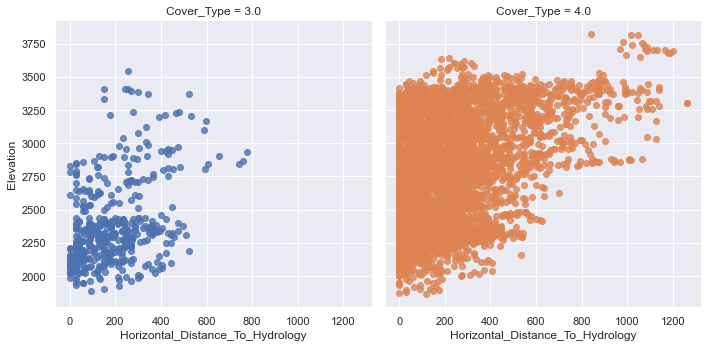

In [35]:
pred_linear_scratch = X_test.copy()
pred_linear_scratch['Cover_Type'] = predictions_rounded
sns.lmplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=pred_linear_scratch, hue='Cover_Type', col='Cover_Type', fit_reg=False);

## b1.2) Logistic Regression:

Writing the algorithm, nearly everything is the same with linear regression, only hypothesis function is combined with sigmoid function as:

$$y=\frac{1}{1+{e}^{-wx+b}}$$

The big change here is actually the use of the one vs all method. Normally, many logistic regression problems can be seen to be used for binary classification, but using it for multiple classification can be made possible by adding various methods. The most well-known of these methods are softmax, one vs all, one vs rest methods. Here, it is preferred to apply the one vs all method.

In [19]:
class LogisticRegression:
    #Setting default values and creating the parameters of the method.
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.num_classes = None

    #Sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #setting the initial values
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.num_classes = len(np.unique(y))
        self.weights = np.zeros((self.num_classes, num_features))
        self.bias = np.zeros(self.num_classes)

        # Gradient descent for each class, turning the algorithm from binary classification to multiple classification actually.
        for c in range(self.num_classes):
            binary_y = np.where(y == c, 1, 0)  
            self.weights[c], self.bias[c] = self._gradient_descent(X, binary_y)

    def _gradient_descent(self, X, y):
        num_samples = X.shape[0]
        weights = np.zeros(X.shape[1])
        bias = 0

        for _ in range(self.num_iterations):
            linear_predictions = np.dot(X, weights) + bias
            y_predicted = self.sigmoid(linear_predictions)

            dw = (1 / num_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / num_samples) * np.sum(y_predicted - y)
        
            bias -= self.learning_rate * db
            weights -= self.learning_rate * np.sum(np.outer(dw, np.ones(X.shape[1])), axis=0)

        return weights, bias
            
    #Here all of the propabilities are comparing with each other and the maximum probability class is selecting.
    def predict(self, X):
        linear_predictions = np.dot(X, self.weights.T) + self.bias
        y_predicted_proba = self.sigmoid(linear_predictions)
        return np.argmax(y_predicted_proba, axis=1)


In [20]:
# Create and fit the model
model_2 = LogisticRegression()
model_2.fit(X_train_norm_array, y_train_array)

# Predict
predictions_2 = model_2.predict(X_test_array)
print("Predictions:", predictions_2)

Predictions: [3 2 2 ... 3 2 2]


In [22]:
logistic_reg_accuracy_scratch = accuracy_score(y_test, predictions_2)
print("Logistic Regression Accuracy Rate From Scratch Code:", logistic_reg_accuracy_scratch)

Logistic Regression Accuracy Rate From Scratch Code: 0.24338624338624337


Here, unexpectedly, the accuracy rate was much lower than the ready-made function. A more accurate inference can be made after looking at the predictions plot below.

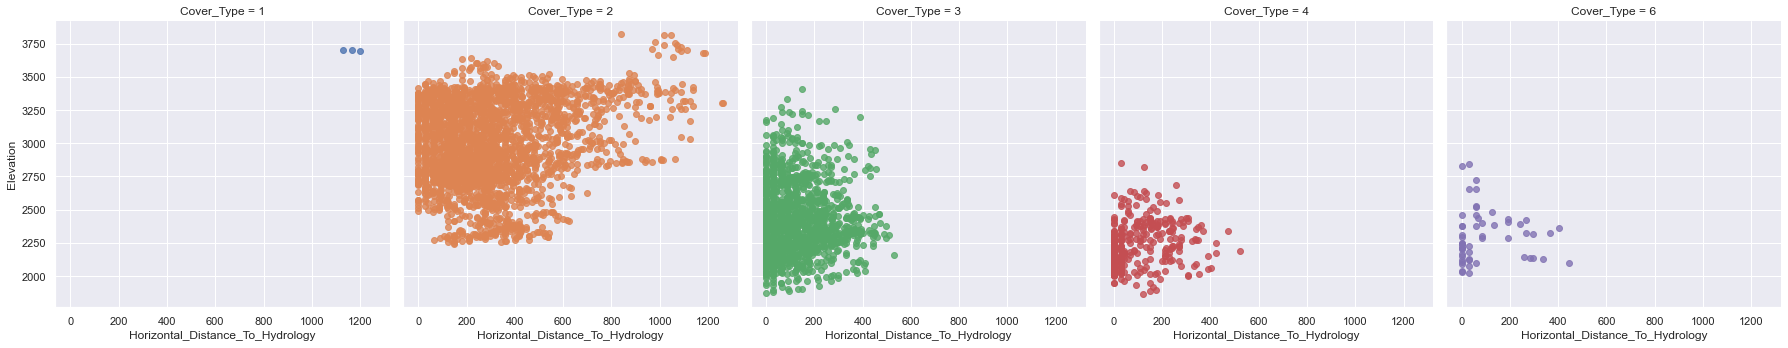

In [23]:
new_pred_scratch = X_test.copy()
new_pred_scratch['Cover_Type'] = predictions_2
sns.lmplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=new_pred_scratch, hue='Cover_Type', col='Cover_Type', fit_reg=False)

Although there are seven types in total, we see that this model only makes predictions in five models. Almost every Cover_Type is confused with 2, the model can perhaps be edited with other calculation methods and tried to use the new one.

Trying multiclass logistic regression with softmax method:

In [25]:
class Multinomial_Regression(): 
    def __init__(self, learning_rate=0.005, max_epoch=3000):     
        self.learning_rate = learning_rate                  
        self.max_epoch = max_epoch                      
        self.weight = None
    
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'max_epoch': self.max_epoch
        }
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def cost_derivate_gradient(self, n, Ti, Oi, X):
        Ti = np.array(Ti)
        Oi = np.array(Oi)
        X = np.array(X)
        result = -(np.dot(X.reshape(-1, 1), (Ti - Oi))) / n
        return result

    def function_cost_J(self, n, Ti, Oi):
        result = -(np.sum(Ti * np.log(Oi))) / n 
        return result
    
    def one_hot_encoding(self, Y):
        classes = np.unique(Y)
        OneHotEncoding = np.eye(len(classes))[Y - classes.min()]
        return OneHotEncoding
    
    def softmax(self, z):
        soft = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T 
        return soft
    
    def predict(self, X):
        if self.weight is None:
            raise ValueError("Model has not been trained yet.")
        
        Z = np.matmul(X, self.weight)
        Oi = self.softmax(Z)
        return np.argmax(Oi, axis=1)
    
    def fit(self, X, y):
        X = np.array(X)  # Convert X to numpy array
        y = np.array(y)  # Convert y to numpy array
        classes = np.unique(y)
        self.weight = np.random.rand(X.shape[1], len(classes))
        v_epochs = []
        totalError = []
        epochCount = 0
        n = len(X)
        gradientE = []
        while epochCount < self.max_epoch:
            Ti = self.one_hot_encoding(y)
            Z = np.matmul(X, self.weight)
            Oi = self.softmax(Z)
            erro = self.function_cost_J(n, Ti, Oi)
            
            # Calculate gradient for each sample
            gradient = np.zeros_like(self.weight)
            for i in range(n):
                gradient += self.cost_derivate_gradient(1, Ti[i], Oi[i], X[i])
            
            # Ensure gradient has the correct shape
            assert gradient.shape == self.weight.shape, "Gradient shape does not match expected shape"
            
            # Aggregate gradients over samples
            mean_gradient = gradient / n
            
            self.weight = self.weight - self.learning_rate * mean_gradient
            
            if epochCount % 100 == 0:
                totalError.append(erro)
                gradientE.append(mean_gradient)
                v_epochs.append(epochCount)
                print("Epoch ", epochCount, " Total Error:", "%.4f" % erro)
            epochCount += 1
        

        
        self.show_err_graphic(v_epochs, totalError)
        return self

    
    def show_err_graphic(self, v_epoch, v_error):
        plt.figure(figsize=(9, 4))
        plt.plot(v_epoch, v_error, "m-")
        plt.xlabel("Number of Epoch")
        plt.ylabel("Error")
        plt.title("Error Minimization")
        plt.show()


In [26]:
arguments = {'Epoch':6000, 'LearningRate':0.01}
SoftmaxRegression = Multinomial_Regression()
SoftmaxRegression.fit(X_train_norm_array, y_train_array)


Epoch  0  Total Error: 20839.9542
Epoch  100  Total Error: 20825.2195
Epoch  200  Total Error: 20812.3946
Epoch  300  Total Error: 20801.1905
Epoch  400  Total Error: 20791.3687


KeyboardInterrupt: 

In [ ]:
acc_test,test_set,test_vers,test_virg = SoftmaxRegression.predict(X_test_array,y_test_array)
print("Hits - Porcent (Test): ", acc_test,"% hits")

### b2) Try to figure out why the model accuracies of linear regression and logistic regression are too different by analyzing your code. And emphasize the main assumption and corresponding line in your code that lead to performance change. 

The accuracy gap between logistic and linear regression is actually expected musch more than the found difference. But since the theoretical method between the two methods is known, comments can be made accordingly.

The main difference hear is actually, logistic regression uses sigmoid function for optimizing the gradient discent.
For linear regression the function was as: 
$$y=wx+b$$
But at logistic regression instead of just using the y values directly we another form of this function named sigmoid. With sigmoid function, actually it calculates propabilities by using linear function values (y). The mathematical representation of the sigmoid function, and the function used for estiations are showed below respectively:
$$s\left(x\right)=\frac{1}{1+{e}^{-x}}$$
$$y=\frac{1}{1+{e}^{-wx+b}}$$

In this case the change created by the lines given below:

```python
linear_predictions = np.dot(X, self.weights) + self.bias           
y_predicted = self.sigmoid(linear_predictions).reshape(-1, 1)

And the sigmoid function is defined as:

```python
def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

And another main difference can be stated as the implementation of the methods. In linear regression directly the value of the predictions are calculating by the hypothesis function giden abowe. On the other hand, for ogistic regrsssion the probabilities are calculated by sigmoid fonstion and comparing with each other to decide the class selection.

## Part c) This time, you have a different dataset with categorical features to train a model (X_train2, y_train2). You need to write decision tree algorithm that we presented in the lecture from scratch without using any library.  

### c1) Implement decision tree algorithm (with categorical features (C4.5)) from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Plot feature importance for your model.

In [27]:
from collections import Counter

Firstly cheching out the new training test if there are any null values, or if any normalization needed:

In [28]:
# Check for completely zero columns
zero_columns = []
for column in X_train2.columns:
    if (df[column] == 0).all():
        zero_columns.append(column)

if zero_columns:
    print("Columns with all zero values:", zero_columns)
else:
    print("No columns with all zero values.")

Columns with all zero values: ['Soil_Type7', 'Soil_Type15']


In [29]:
# Dropping columns
X_train2.drop(columns= zero_columns, inplace=True)
X_test2.drop(columns= zero_columns, inplace=True)

In [30]:
X_train2_array = np.array(X_train2)
y_train2_array = np.array(y_train2)
X_test2_array = np.array(X_test2)
y_test2_array = np.array(y_test2)

Since the columns are consisting of binary parameters, there is no need for normalization, after dropping the fully zero columns we can continue.

Decision Tree Algorithm:

In [31]:
# imports
from __future__ import annotations
from typing import Tuple
from abc import ABC,abstractmethod
from scipy import stats
from sklearn.datasets import load_breast_cancer,make_regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error,mean_absolute_error,r2_score

In [79]:
class Node(object):
       
    def __init__(self) -> None:
        
        self.__split    = None
        self.__feature  = None
        self.__left     = None
        self.__right    = None
        self.leaf_value = None

    def set_params(self, split: float, feature: int) -> None:
        
        self.__split   = split
        self.__feature = feature
        
    def get_params(self) -> Tuple[float,int]:
        return(self.__split, self.__feature)    
        
    def set_children(self, left: 'Node', right: 'Node') -> None:
        
        self.__left  = left
        self.__right = right
        
    def get_left_node(self) -> 'Node':
        
        return self.__left
    
    def get_right_node(self) -> 'Node':
        
        return self.__right


class DecisionTree(ABC):

    def __init__(self, max_depth: int=None, min_samples_split: int=2) -> None:
        self.tree              = None
        self.max_depth         = max_depth
        self.min_samples_split = min_samples_split
        
    @abstractmethod
    def _impurity(self, D: np.array) -> None:
        pass
        
    @abstractmethod
    def _leaf_value(self, D: np.array) -> None:
        pass
        
    def __grow(self, node: Node, D: np.array, level: int) -> None:
        print(f"Level {level}, D shape: {D.shape if D is not None else None}")
        
        if D is None:
            return  # Exit early if D is None
        
        # are we in a leaf node?
        depth = (self.max_depth is None) or (self.max_depth >= (level+1))
        msamp = (self.min_samples_split <= D.shape[0])
        n_cls = np.unique(D[:,-1]).shape[0] != 1
        
        # not a leaf node
        if depth and msamp and n_cls:
        
            # initialize the function parameters
            ip_node = None
            feature = None
            split   = None
            left_D  = None
            right_D = None
            # iterate through the possible feature/split combinations
            for f in range(D.shape[1]-1):
                for s in np.unique(D[:,f]):
                    # for the current (f,s) combination, split the dataset
                    D_l = D[D[:,f]<=s]
                    D_r = D[D[:,f]>s]
                    # ensure we have non-empty arrays
                    if D_l.size and D_r.size:
                        # calculate the impurity
                        ip  = (D_l.shape[0]/D.shape[0])*self._impurity(D_l) + (D_r.shape[0]/D.shape[0])*self._impurity(D_r)
                        # now update the impurity and choice of (f,s)
                        if (ip_node is None) or (ip < ip_node):
                            ip_node = ip
                            feature = f
                            split   = s
                            left_D  = D_l
                            right_D = D_r
            # set the current node's parameters
            node.set_params(split,feature)
            # declare child nodes
            left_node  = Node()
            right_node = Node()
            node.set_children(left_node,right_node)
            # investigate child nodes
            self.__grow(node.get_left_node(),left_D,level+1)
            self.__grow(node.get_right_node(),right_D,level+1)
                        
        # is a leaf node
        else:
            # set the node value & return
            node.leaf_value = self._leaf_value(D)
            return
     
    def __traverse(self, node: Node, Xrow: np.array) -> int | float:       
    # check if we're in a leaf node?
        if node.leaf_value is None:
        # get parameters at the node
            (s, f) = node.get_params()
        # decide to go left or right?
            if s is not None:  # Check if s is not None
                if (Xrow[f] <= s):
                    return self.__traverse(node.get_left_node(), Xrow)
                else:
                    return self.__traverse(node.get_right_node(), Xrow)
            else:
            # Handle the case where s is None (cannot make a decision)
            # You might want to define some default behavior here
                return 0  # For example, return 0
        else:
        # return the leaf value
            return node.leaf_value
    
    def train(self, Xin: np.array, Yin: np.array) -> None:      
        # prepare the input data
        D = np.concatenate((Xin,Yin.reshape(-1,1)),axis=1)
        print(f"Before growing tree, D shape: {D.shape}")
        # set the root node of the tree
        self.tree = Node()
        # build the tree
        self.__grow(self.tree,D,1)
        
    def predict(self, Xin: np.array) -> np.array:
    # iterate through the rows of Xin
        p = []
        for r in range(Xin.shape[0]):
            prediction = self.__traverse(self.tree, Xin[r, :])
        # Ensure that the prediction is a scalar value
            if isinstance(prediction, (int, float)):
                p.append(prediction)
            else:
            # Handle cases where prediction is not a scalar
            # For example, you can take the mode of the prediction array
                p.append(stats.mode(prediction)[0][0])
    # return predictions
        return np.array(p)



class DecisionTreeClassifier(DecisionTree):
     
    def __init__(self, max_depth: int=None, min_samples_split: int=2, loss: str='gini') -> None:
        DecisionTree.__init__(self,max_depth,min_samples_split)
        self.loss = loss   
    
    def __gini(self, D: np.array) -> float:      
        # initialize the output
        G = 0
        # iterate through the unique classes
        for c in np.unique(D[:,-1]):
            # compute p for the current c
            p = D[D[:,-1]==c].shape[0]/D.shape[0]
            # compute term for the current c
            G += p*(1-p)
        # return gini impurity
        return G
    
    def __entropy(self, D: np.array) -> float:      
        # initialize the output
        H = 0
        # iterate through the unique classes
        for c in np.unique(D[:,-1]):
            # compute p for the current c
            p = D[D[:,-1]==c].shape[0]/D.shape[0]
            # compute term for the current c
            H -= p*np.log2(p)
        # return entropy
        return H
    
    def _impurity(self, D: np.array) -> float:       
        # use the selected loss function to calculate the node impurity
        ip = None
        if self.loss == 'gini':
            ip = self.__gini(D)
        elif self.loss == 'entropy':
            ip = self.__entropy(D)
        # return results
        return ip
    
    def _leaf_value(self, D: np.array) -> int:
        return stats.mode(D[:,-1])[0]




In [80]:
clf = DecisionTreeClassifier(max_depth=5,loss='gini')
clf.train(X_train2_array,y_train2_array)


Before growing tree, D shape: (10584, 39)
Level 1, D shape: (10584, 39)
Level 2, D shape: (9060, 39)
Level 3, D shape: (8401, 39)
Level 4, D shape: (7892, 39)
Level 5, D shape: (7429, 39)
Level 5, D shape: (463, 39)
Level 4, D shape: (509, 39)
Level 5, D shape: None
Level 5, D shape: None
Level 3, D shape: (659, 39)
Level 4, D shape: None
Level 4, D shape: None
Level 2, D shape: (1524, 39)
Level 3, D shape: None
Level 3, D shape: None


In [81]:
yp_train = clf.predict(X_train2_array)
yp = clf.predict(X_test2_array)

In [82]:
print("Train accuracy: ", accuracy_score(y_train2_array,yp_train))
print("Test accuracy: ", accuracy_score(y_test2_array,yp))

Train accuracy:  0.17611489040060468
Test accuracy:  0.1779100529100529


The accuracy rate is too low. There seems to be underfitting problem since both training an dtesting accuracies are too low.

- DecisionTree Second Attempt:

In [39]:
class TreeNode():
    def __init__(self, data, feature_idx, feature_val, prediction_probs, information_gain) -> None:
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.prediction_probs = prediction_probs
        self.information_gain = information_gain
        self.feature_importance = self.data.shape[0] * self.information_gain
        self.left = None
        self.right = None

    def node_def(self) -> str:

        if (self.left or self.right):
            return f"NODE | Information Gain = {self.information_gain} | Split IF X[{self.feature_idx}] < {self.feature_val} THEN left O/W right"
        else:
            unique_values, value_counts = np.unique(self.data[:,-1], return_counts=True)
            output = ", ".join([f"{value}->{count}" for value, count in zip(unique_values, value_counts)])            
            return f"LEAF | Label Counts = {output} | Pred Probs = {self.prediction_probs}"

In [62]:
class DecisionTree():

    def __init__(self, max_depth=4, min_samples_leaf=1, 
                 min_information_gain=0.0, numb_of_features_splitting=None,
                 amount_of_say=None) -> None:
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.numb_of_features_splitting = numb_of_features_splitting
        self.amount_of_say = amount_of_say

    def _entropy(self, class_probabilities: list) -> float:
        return sum([-p * np.log2(p) for p in class_probabilities if p>0])
    
    def _class_probabilities(self, labels: list) -> list:
        total_count = len(labels)
        return [label_count / total_count for label_count in Counter(labels).values()]

    def _data_entropy(self, labels: list) -> float:
        return self._entropy(self._class_probabilities(labels))
    
    def _partition_entropy(self, subsets: list) -> float:
        total_count = sum([len(subset) for subset in subsets])
        return sum([self._data_entropy(subset) * (len(subset) / total_count) for subset in subsets])
    
    def _split(self, data: np.array, feature_idx: int, feature_val: float) -> tuple:
        
        mask_below_threshold = data[:, feature_idx] < feature_val
        group1 = data[mask_below_threshold]
        group2 = data[~mask_below_threshold]

        return group1, group2
    
    def _select_features_to_use(self, data: np.array) -> list:
        feature_idx = list(range(data.shape[1]-1))

        if self.numb_of_features_splitting == "sqrt":
            feature_idx_to_use = np.random.choice(feature_idx, size=int(np.sqrt(len(feature_idx))))
        elif self.numb_of_features_splitting == "log":
            feature_idx_to_use = np.random.choice(feature_idx, size=int(np.log2(len(feature_idx))))
        else:
            feature_idx_to_use = feature_idx

        return feature_idx_to_use
        
    def _find_best_split(self, data: np.array) -> tuple:
        min_part_entropy = 1e9
        feature_idx_to_use =  self._select_features_to_use(data)

        for idx in feature_idx_to_use:
            feature_vals = np.percentile(data[:, idx], q=np.arange(25, 100, 25))
            for feature_val in feature_vals:
                g1, g2, = self._split(data, idx, feature_val)
                part_entropy = self._partition_entropy([g1[:, -1], g2[:, -1]])
                if part_entropy < min_part_entropy:
                    min_part_entropy = part_entropy
                    min_entropy_feature_idx = idx
                    min_entropy_feature_val = feature_val
                    g1_min, g2_min = g1, g2

        return g1_min, g2_min, min_entropy_feature_idx, min_entropy_feature_val, min_part_entropy

    def _find_label_probs(self, data: np.array) -> np.array:

        labels_as_integers = data[:,-1].astype(int)
        # Calculate the total number of labels
        total_labels = len(labels_as_integers)
        # Calculate the ratios (probabilities) for each label
        label_probabilities = np.zeros(len(self.labels_in_train), dtype=float)

        # Populate the label_probabilities array based on the specific labels
        for i, label in enumerate(self.labels_in_train):
            label_index = np.where(labels_as_integers == i)[0]
            if len(label_index) > 0:
                label_probabilities[i] = len(label_index) / total_labels

        return label_probabilities

    def _create_tree(self, data: np.array, current_depth: int) -> TreeNode:
        # Check if the max depth has been reached (stopping criteria)
        if current_depth > self.max_depth:
            return None
        
        # Find best split
        split_1_data, split_2_data, split_feature_idx, split_feature_val, split_entropy = self._find_best_split(data)
        
        # Find label probs for the node
        label_probabilities = self._find_label_probs(data)

        # Calculate information gain
        node_entropy = self._entropy(label_probabilities)
        information_gain = node_entropy - split_entropy
        
        # Create node
        node = TreeNode(data, split_feature_idx, split_feature_val, label_probabilities, information_gain)

        # Check if the min_samples_leaf has been satisfied (stopping criteria)
        if self.min_samples_leaf > split_1_data.shape[0] or self.min_samples_leaf > split_2_data.shape[0]:
            return node
        # Check if the min_information_gain has been satisfied (stopping criteria)
        elif information_gain < self.min_information_gain:
            return node

        current_depth += 1
        node.left = self._create_tree(split_1_data, current_depth)
        node.right = self._create_tree(split_2_data, current_depth)
        
        return node
    
    def _predict_one_sample(self, X: np.array) -> np.array:
        node = self.tree

        # Finds the leaf which X belongs
        while node:
            pred_probs = node.prediction_probs
            if X[node.feature_idx] < node.feature_val:
                node = node.left
            else:
                node = node.right

        return pred_probs

    def train(self, X_train: np.array, Y_train: np.array) -> None:

        # Concat features and labels
        self.labels_in_train = np.unique(Y_train)
        train_data = np.concatenate((X_train, np.reshape(Y_train, (-1, 1))), axis=1)

        # Start creating the tree
        self.tree = self._create_tree(data=train_data, current_depth=0)

        # Calculate feature importance
        self.feature_importances = dict.fromkeys(range(X_train.shape[1]), 0)
        self._calculate_feature_importance(self.tree)
        # Normalize the feature importance values
        self.feature_importances = {k: v / total for total in (sum(self.feature_importances.values()),) for k, v in self.feature_importances.items()}

    def predict_proba(self, X_set: np.array) -> np.array:
        pred_probs = np.apply_along_axis(self._predict_one_sample, 1, X_set)
        
        return pred_probs

    def predict(self, X_set: np.array) -> np.array:
        pred_probs = self.predict_proba(X_set)
        preds = np.argmax(pred_probs, axis=1)
        
        return preds    
        

    def _calculate_feature_importance(self, node):
        # This method recursively calculates feature importance by traversing the decision tree
        if node is not None:
            self.feature_importances[node.feature_idx] += node.feature_importance
            self._calculate_feature_importance(node.left)
            self._calculate_feature_importance(node.right)

    def print_feature_importance(self):
        # This method prints out the normalized feature importance values
        if hasattr(self, 'feature_importances'):
            print("Feature Importance:")
            total_importance = sum(self.feature_importances.values())
            for feature_idx, importance in self.feature_importances.items():
                normalized_importance = importance / total_importance
                print(f"Feature {feature_idx}: {normalized_importance}")
        else:
            print("Model has not been trained yet.")

In [60]:
# Building the tree
my_tree = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0)
my_tree.train(X_train2_array, y_train2_array)

# Let's see the Train performance
train_preds = my_tree.predict(X_set=X_train)
# Test performance
test_preds = my_tree.predict(X_set=X_test2_array)


In [57]:
print("Accuracy", accuracy_score(y_test2_array,test_preds))
print("Accuracy", accuracy_score(y_train2_array,train_preds))

Accuracy 0.13668430335097
Accuracy 0.1455026455026455


There is underfitting since the both training and the testing accuracies are too low.

Feature Importance Calculation:

In [63]:
# Print feature importance
my_tree.print_feature_importance()

Feature Importance:
Feature 0: 1.0
Feature 1: -0.0
Feature 2: -0.0
Feature 3: -0.0
Feature 4: -0.0
Feature 5: -0.0
Feature 6: -0.0
Feature 7: -0.0
Feature 8: -0.0
Feature 9: -0.0
Feature 10: -0.0
Feature 11: -0.0
Feature 12: -0.0
Feature 13: -0.0
Feature 14: -0.0
Feature 15: -0.0
Feature 16: -0.0
Feature 17: -0.0
Feature 18: -0.0
Feature 19: -0.0
Feature 20: -0.0
Feature 21: -0.0
Feature 22: -0.0
Feature 23: -0.0
Feature 24: -0.0
Feature 25: -0.0
Feature 26: -0.0
Feature 27: -0.0
Feature 28: -0.0
Feature 29: -0.0
Feature 30: -0.0
Feature 31: -0.0
Feature 32: -0.0
Feature 33: -0.0
Feature 34: -0.0
Feature 35: -0.0
Feature 36: -0.0
Feature 37: -0.0


### c2) Benefiting from the decision tree algorithm, implement random forest  algorithm from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Compare your result with c1. Plot feature importance for your model

### c3) Assume you can add an additional feature to (X_train2, X_test2) from the features in "df" dataframe in the third line of this notebook. All features are listed in df.columns. Define a procedure to choose the feature that will maximize your model's accuracy. Define a procedure to present this feature as a categorical variable and add this discretized single feature into (X_train2, X_test2). Then train models with the developed algorithms in c1 and c2. Compare the obtained results with the results in c1, c2


Correlation matrix can be check firstly. Here I choose the columns other than Soil_Type's

<function matplotlib.pyplot.show(close=None, block=None)>

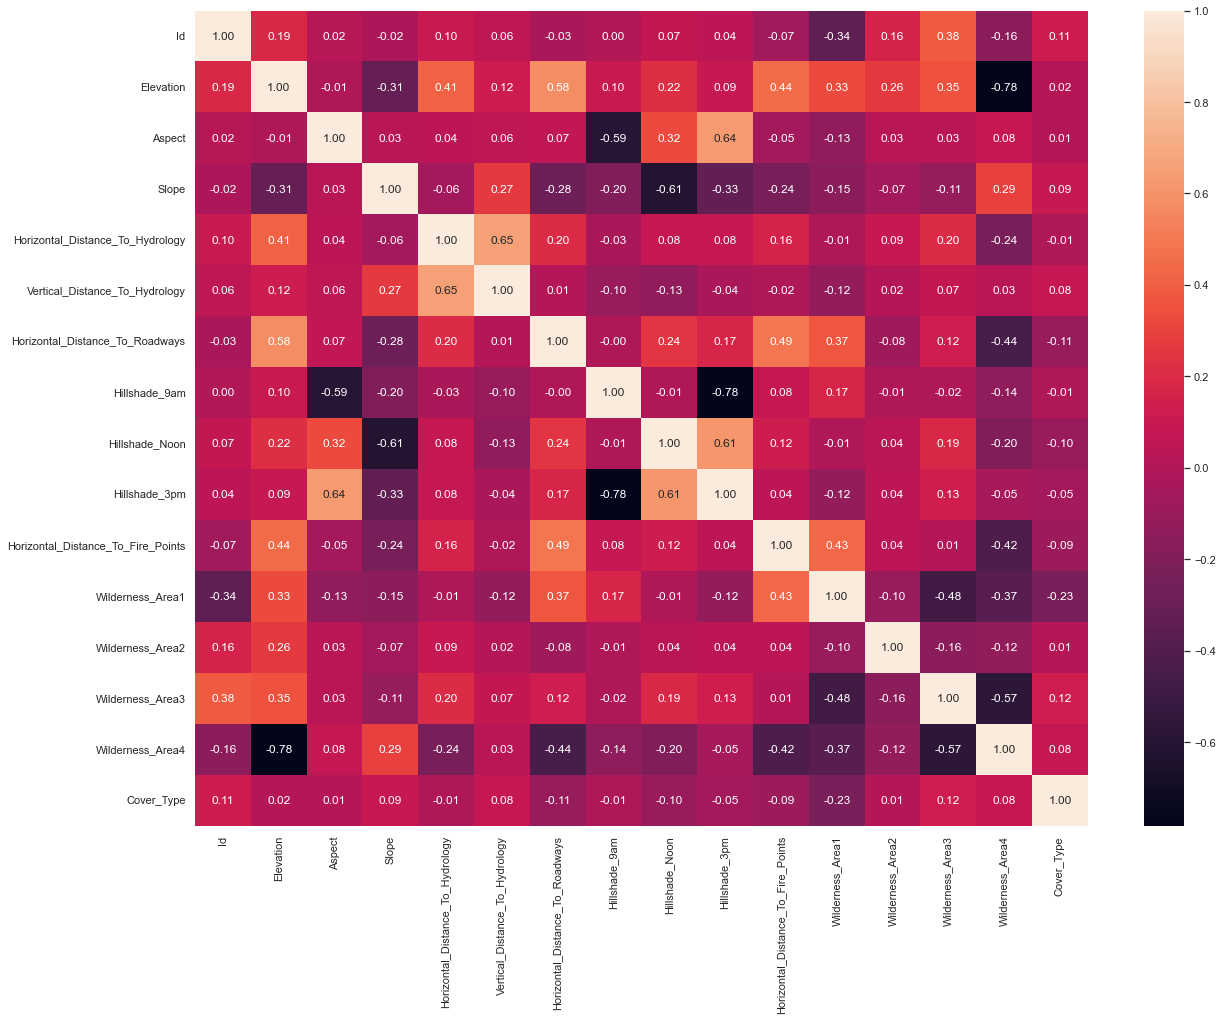

In [71]:
list_features =['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Cover_Type']
plt.figure(figsize=(20, 15)) 
sns.heatmap(df[list_features].corr(), annot=True,fmt=".2f",)
plt.show

I am adding the most correlated features with Cover_Type. And splitting the dataframe as stated before:

In [74]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
X3 = df[filter_col]
X3["Wilderness_Area3"] = df["Wilderness_Area3"]
X3["Slope"] = df["Slope"]
y3 = df[["Cover_Type"]]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42) # don't change random state

C:\Users\ecems\AppData\Local\Temp\ipykernel_3780\187592526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3["Wilderness_Area3"] = df["Wilderness_Area3"]
C:\Users\ecems\AppData\Local\Temp\ipykernel_3780\187592526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3["Slope"] = df["Slope"]


New data frames are turning into numpy arrays:

In [75]:
X_train3_array = np.array(X_train3)
y_train3_array = np.array(y_train3)
X_test3_array = np.array(X_test3)
y_test3_array = np.array(y_test3)

The most efficient decision tree algorithm is applied to new data:

In [85]:
clf = DecisionTreeClassifier(max_depth=5,loss='gini')
clf.train(X_train3_array,y_train3_array)
yp3 = clf.predict(X_test3_array)
yp3_train = clf.predict(X_train3_array)

Before growing tree, D shape: (10584, 43)
Level 1, D shape: (10584, 43)
Level 2, D shape: (9060, 43)
Level 3, D shape: (8401, 43)
Level 4, D shape: (7892, 43)
Level 5, D shape: (7429, 43)
Level 5, D shape: (463, 43)
Level 4, D shape: (509, 43)
Level 5, D shape: (205, 43)
Level 5, D shape: (304, 43)
Level 3, D shape: (659, 43)
Level 4, D shape: (604, 43)
Level 5, D shape: (184, 43)
Level 5, D shape: (420, 43)
Level 4, D shape: (55, 43)
Level 5, D shape: (6, 43)
Level 5, D shape: (49, 43)
Level 2, D shape: (1524, 43)
Level 3, D shape: (1054, 43)
Level 4, D shape: (43, 43)
Level 5, D shape: (27, 43)
Level 5, D shape: (16, 43)
Level 4, D shape: (1011, 43)
Level 5, D shape: (529, 43)
Level 5, D shape: (482, 43)
Level 3, D shape: (470, 43)
Level 4, D shape: (307, 43)
Level 5, D shape: (68, 43)
Level 5, D shape: (239, 43)
Level 4, D shape: (163, 43)
Level 5, D shape: (157, 43)
Level 5, D shape: (6, 43)


In [86]:
print("Train accuracy: " ,accuracy_score(y_test3_array,yp3))
print("Test accuracy: " ,accuracy_score(y_train3_array,yp3_train))

Train accuracy:  0.3608906525573192
Test accuracy:  0.3573318216175359


Both train and test accuracies are increased compared to first attempts of applying decision tree. The correlated features help to increase accuracy as expected. Before adding those two features the accuracy rate for both test and training are around 17 per cent.